In [2]:
] activate

  Activating project at `~/.julia/environments/v1.8`


In [7]:
using Interact
using UnPack

WebIO._IJuliaInit()

In [4]:
using ComputationalHeatTransfer
using Plots
gr()  

Plots.GRBackend()

# Read simulation data

In [8]:
read_path = dirname(dirname(dirname(pwd())))*"/OHPnume/OHP2_40W_large.jld2"
SimuResult = load(read_path)["SimulationResult"];

### get time array

In [9]:
t = SimuResult.tube_hist_t;

# Plot 2D graphs

### film and slug dynamics

[ Info: Saved animation to /Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif


Plots.AnimatedGif("/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif")
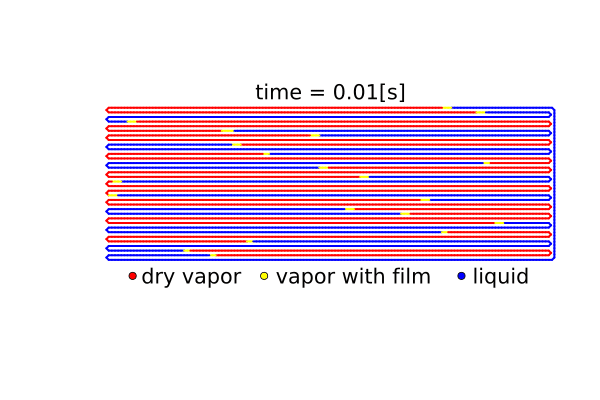

In [10]:
@gif for i in eachindex(t)
    plot(OHPSlug(),i,SimuResult)
end

### plate T [K]

[ Info: Saved animation to /Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif


Plots.AnimatedGif("/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif")
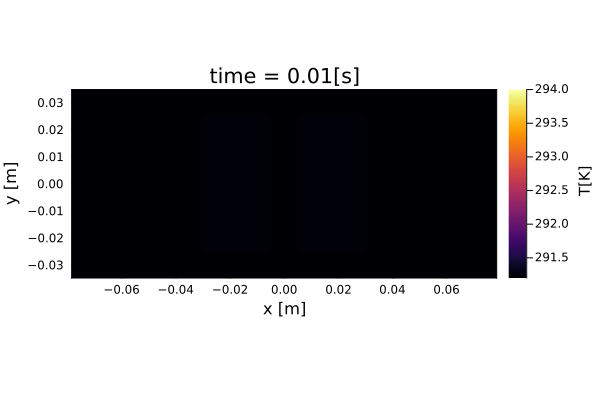

In [11]:
@gif for i in eachindex(t)
    plot(OHPTemp(),i,SimuResult,clim=(291.2,294.0))
end

### 2D superheat

[ Info: Saved animation to /Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif


Plots.AnimatedGif("/Users/yuxuanli/Documents/GitHub/ComputationalHeatTransfer.jl/examples/tmp.gif")
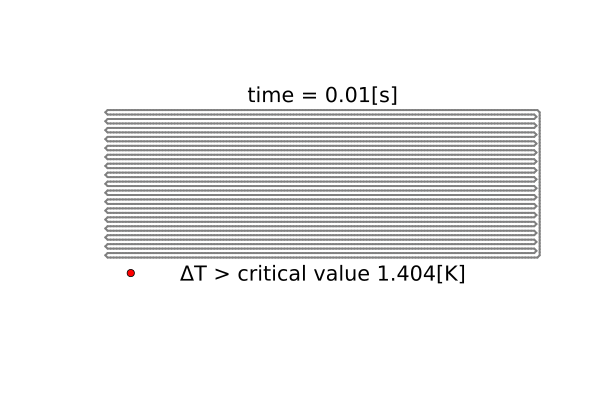

In [12]:
@gif for i in eachindex(t)
# @gif for i =1:10
    plot(OHPSuper(),i,SimuResult)
end

### 2D pressure

In [ ]:
@gif for i in eachindex(t)
    plot(OHPPres(),i,SimuResult)
end

# Plot 2D interpolated curves

### Interpolate 2D T data from the plate for fixed sensors on the plate

place the 2D sensors

In [13]:
x2Dsensors = [-2.75,-1.4,-0.8,0.0,0.0,0.8,1.4,2.75] .* inches
y2Dsensors = [0.0,   0.0, 0.0,0.0,0.4,0.0,0.0,0.0] .* inches
plate_sensors = (x2Dsensors,y2Dsensors);

get the curve

In [14]:
t_hist,g_hist = getTcurve(plate_sensors,SimuResult);

### Read experiment T data

In [15]:
import XLSX

read experiment file (customizable)

In [16]:
# customize 
expfile = expfileDict["O002_H001_P040"]
exppath = dirname(dirname(dirname(pwd())))*"/OHPexp/"
xf = XLSX.readxlsx(exppath*expfile);

get experiment data

In [17]:
Onum, Hnum, power_exp = getconfig(expfile)
RTDt,RTD = getRTD(xf,Onum);

### 2D interpolated temperature curve at fixed sensors

In [18]:
RTD_for_plotting = [1,4,8];

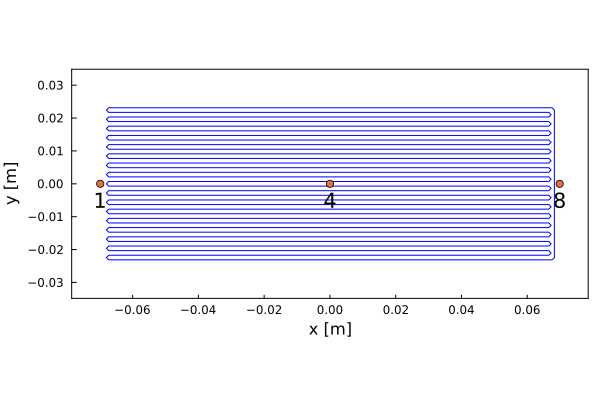

In [19]:
# plot OHP
plot(OHP(),SimuResult)

# plot sensors
scatter!(x2Dsensors[RTD_for_plotting],y2Dsensors[RTD_for_plotting])
annotate!(x2Dsensors[RTD_for_plotting], y2Dsensors[RTD_for_plotting].-0.005, RTD_for_plotting)

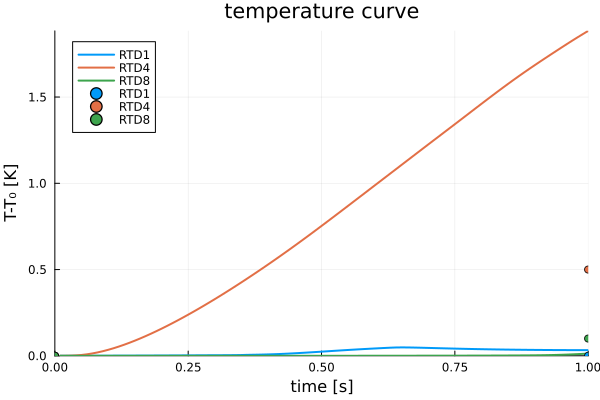

In [20]:
plot(OHPTcurve(),RTD_for_plotting,(t_hist,g_hist),SimuResult)
plot!(OHPTexp() ,RTD_for_plotting,(RTDt,RTD)     ,SimuResult)

### 2D interpolated thermal conductance

In [21]:
ihot = 4 # hot sensor  for calculating thermal conductance
icold = 8 # cold sensor  for calculating thermal conductance;

8

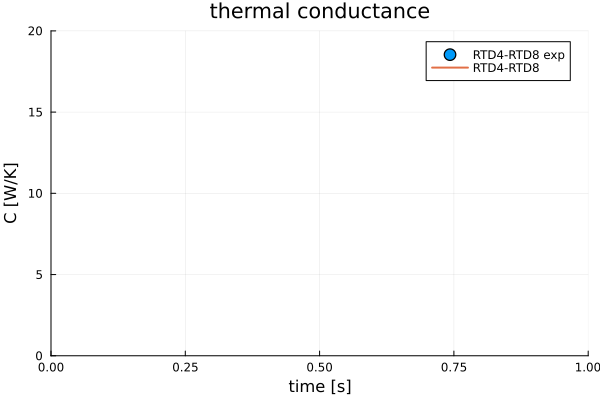

In [22]:
# plot them separately
plot(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult)

### Liquid slug velocity statistics

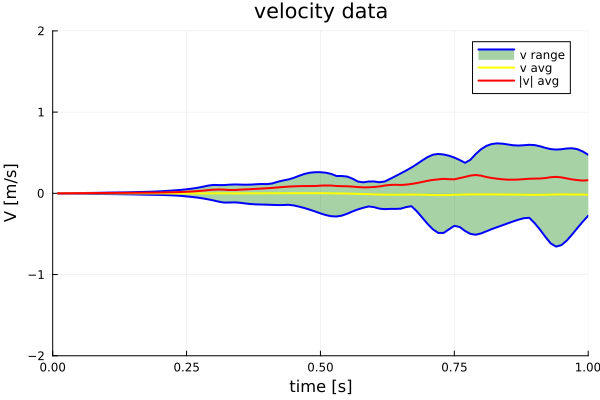

In [23]:
# fix title and ylabel and legend
plot(OHPV(), SimuResult::SimulationResult,ylimit=(-2,2))  

# Plot 1D interpolated curves

In [25]:
# tell the time
@manipulate for i in 1:1:length(t)
    plot(OHP1DT(),i,SimuResult,xlim=(1,2))
    plot!(twinx(),OHPTwall(),i,SimuResult,xlim=(1,2))
#     plot!(twinx(),OHP1DΔT(),i,SimuResult,xlim=(1,2))
#     plot!(twinx(),OHP1DP(),i,SimuResult,xlim=(1,2))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(50), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/yuxuanli/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/yuxuanli/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/yuxuanli/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/yuxuanli/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/yuxuanli/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000019d607490, Task (runnable) @0x000000019d607490), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\

### 1D sensor selector

In [ ]:
L = SimuResult.integrator_tube.p.tube.L
@manipulate for ξ in 0:1e-3:L
    plot(OHP(),SimuResult) # plot the ohp layout

    xprobe,yprobe = oneDtwoDtransform(ξ,SimuResult)
    scatter!([xprobe],[yprobe])
end

## Plot 1D property curve for a fixed location sensor

In [ ]:
xsensors1D = [2.097, 3.0, 4,4.1]

In [ ]:
θhist1D,phist1D = get1DTandP(xsensors1D, SimuResult);

In [ ]:
plot(t,θhist1D,label=string.("ξ=", xsensors1D'),xlabel="time [s]", ylabel="temperature [K]")

### get boiling data

In [ ]:
boil_data,boil_num_x,boil_num_t,t_boil,x2D_boil,y2D_boil,boil_dt = get_boil_matrix(SimuResult::SimulationResult);

In [ ]:
plot(OHP(),SimuResult)
scatter!(x2D_boil,y2D_boil,
    colorbar=true,markeralpha=delta.(boil_num_x),colorbar_title="\n boiling frequency [Hz]",right_margin=3Plots.mm,marker_z=boil_num_x./SimuResult.tube_hist_t[end],markerstrokewidth=0,markercolor=cgrad(:greys, rev = true))

In [ ]:
plot(t_boil,boil_num_t./boil_dt,
color=:orange, legend=:topleft, ylabel="f [HZ]",xlabel="time [s]", label="overall boiling frequency")